In [1]:
import h5py
import psana
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import  rotate
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit,minimize
import multiprocessing
import os
from functools import partial
import time
import sys
import argparse
from datetime import datetime
import tempfile
import XSpect.XSpect_Analysis
import XSpect.XSpect_Controller
import XSpect.XSpect_Visualization


## Viewing Static XES Spectra

Processing: 100%|██████████| 5/5 [00:15<00:00,  3.01s/Shot_Batch]


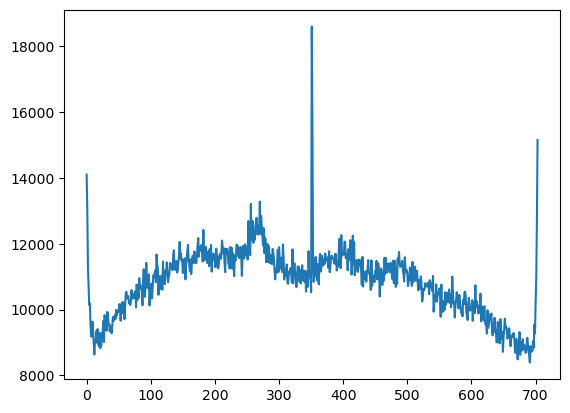

In [20]:
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='mfx',experiment_id='mfxl1045123',lcls_run=23)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
xes.key_epix=['epix_1/ROI_0_area']
#xes.set_key_aliases(keys,names)
#xes.import_roi=[[0,100]]
xes.rois=[[30,170]]
xes.adu_cutoff=3.0
xes.angle=0
xes.transpose=True
xes.run_parser(['307'])
start=time.time()
xes.primary_analysis_parallel_range(4,xes_experiment,method=xes.primary_analysis_static,increment=2000,verbose=False)
end=time.time()
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_ROI_1_summed')
plt.plot(v.summed_xes)
foil_Fe_bad=v.summed_xes

In [21]:
#xes.analyzed_runs[0].epix_summed
#v.combine_static_spectra(xes_analysis=xes,xes_key='epix_summed')


In [22]:
#v.summed_xes

In [23]:
xes.analyzed_runs[0].epix_summed
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_summed')
tod_sum=v.summed_xes


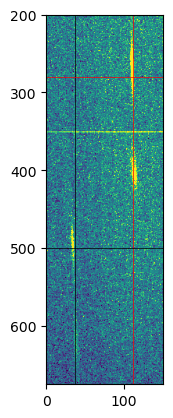

In [24]:
vmin, vmax = np.percentile(tod_sum, [1,99])
plt.imshow(tod_sum,vmin = vmin, vmax = vmax)
plt.axvline(111, color = 'r',linewidth=0.5)
plt.axvline(37, color = 'k', linewidth=0.5)

plt.xlim(0, 150)

# Set y-axis limits
plt.ylim(675, 200)
#plt.axvline(30)
#plt.axvline(45)
plt.axhline(280, color='r',linewidth=0.5)
plt.axhline(500, color='k', linewidth=0.5)

In [64]:
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='mfx',experiment_id='mfxl1045123',lcls_run=23)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
xes.key_epix=['epix_1/ROI_0_area']
#xes.set_key_aliases(keys,names)
#xes.import_roi=[[0,100]]
xes.rois=[[30,170]]
xes.adu_cutoff=3.0
xes.angle=0
xes.transpose=True
xes.run_parser(['165-187'])
start=time.time()
xes.primary_analysis_parallel_range(4,xes_experiment,method=xes.primary_analysis_static,increment=2000,verbose=False)
end=time.time()
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_ROI_1_summed')
plt.plot(v.summed_xes/np.max(v.summed_xes[450:675]))
plt.plot(foil_Fe_bad/np.max(foil_Fe_bad[450:675]))

Processing:  57%|█████▋    | 65/115 [01:18<01:00,  1.20s/Shot_Batch]


KeyboardInterrupt: 

ValueError: operands could not be broadcast together with shapes (704,150) (704,) 

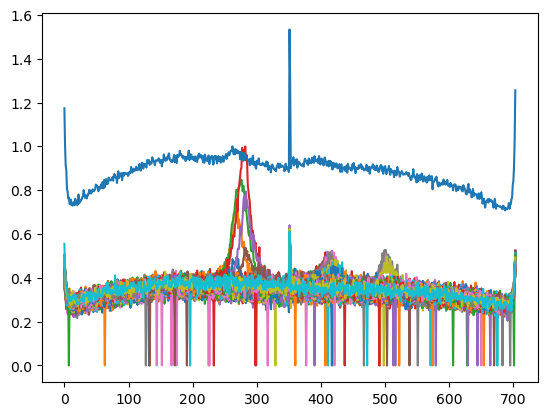

In [10]:
#plt.plot(v.summed_xes/np.max(v.summed_xes[200:300]))
#plt.plot(foil_Fe_bad/np.max(foil_Fe_bad[200:300]))
#diff_Fe_foil=(v.summed_xes/np.max(v.summed_xes[200:300]))-(foil_Fe_bad/np.max(foil_Fe_bad[200:300]))
#plt.plot(diff_Fe_foil)
#plt.title('Difference in Cu Foil between the two days')
#plt.legend(['11/15','11/16','difference'])

In [8]:
xes.analyzed_runs[0].epix_summed
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_summed')
yes_sum=v.summed_xes


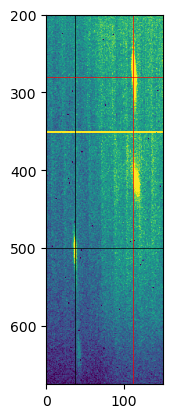

In [49]:
vmin, vmax = np.percentile(yes_sum, [1,99])
plt.imshow(yes_sum,vmin = vmin, vmax = vmax)
plt.axvline(112, color = 'r',linewidth=0.5)
plt.axvline(37, color = 'k', linewidth=0.5)

plt.xlim(0, 150)

# Set y-axis limits
plt.ylim(675, 200)
#plt.axvline(30)
#plt.axvline(45)
plt.axhline(280, color='r',linewidth=0.5)
plt.axhline(500, color='k', linewidth=0.5)

In [45]:
yes_sum-tod_sum

array([[  10.190674,  -62.086426,  374.636   , ...,  438.5415  ,
         427.3938  ,  970.1323  ],
       [ 476.7942  ,   30.756348,  -50.76245 , ...,  357.65674 ,
         262.32593 ,  254.03052 ],
       [ 263.85278 ,  -18.906006,  157.8164  , ...,   87.13257 ,
         218.38867 ,  311.40845 ],
       ...,
       [ 447.2732  , -110.392334,  -30.300049, ...,   45.855225,
         107.493164,  217.76392 ],
       [ 317.14355 ,  -92.927   ,  249.28198 , ...,  219.96191 ,
         358.39404 ,  293.8645  ],
       [ 517.90454 , -154.76538 ,  283.13477 , ...,   98.96094 ,
         475.4485  ,  355.38477 ]], dtype=float32)

Processing: 100%|██████████| 15/15 [00:15<00:00,  1.03s/Shot_Batch]


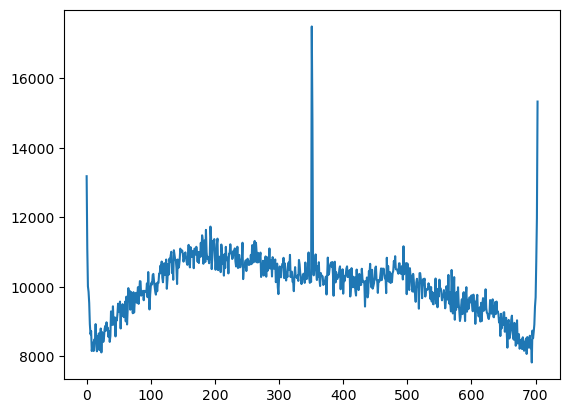

In [11]:
#Fe k-alpha
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='mfx',experiment_id='mfxl1045123',lcls_run=23)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
xes.key_epix=['epix_1/ROI_0_area']
#xes.set_key_aliases(keys,names)
#xes.import_roi=[[0,100]]
xes.rois=[[25,60]]
xes.adu_cutoff=3.0
xes.angle=0
xes.transpose=True
xes.run_parser(['252-254'])
start=time.time()
xes.primary_analysis_parallel_range(4,xes_experiment,method=xes.primary_analysis_static,increment=2000,verbose=False)
end=time.time()
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_ROI_1_summed')
plt.plot(v.summed_xes)
run3_Fe=v.summed_xes

In [12]:
xes.analyzed_runs[0].epix_summed
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_summed')
v.summed_xes

array([[407.49408, 309.5455 , 415.75345, ..., 476.04388, 363.1222 ,
        459.7581 ],
       [420.58447, 326.0708 , 321.7681 , ..., 383.1962 , 403.8215 ,
        368.23178],
       [344.71402, 227.89201, 267.3161 , ..., 301.16074, 304.4428 ,
        267.51038],
       ...,
       [314.0768 , 239.16173, 254.36363, ..., 284.25076, 351.52606,
        312.40277],
       [395.90836, 333.92688, 342.52856, ..., 361.42865, 440.22876,
        393.36313],
       [421.84088, 352.63766, 387.92984, ..., 375.1801 , 490.04672,
        453.17148]], dtype=float32)

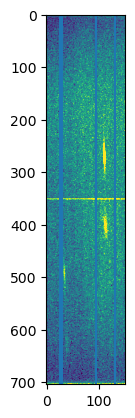

In [13]:
vmin, vmax = np.percentile(v.summed_xes, [1,99])
plt.imshow(v.summed_xes,vmin = vmin, vmax = vmax)
plt.axvline(25)
plt.axvline(95)
plt.axvline(30)
plt.axvline(130)

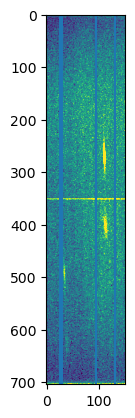

In [14]:
vmin, vmax = np.percentile(v.summed_xes, [1,99])
plt.imshow(v.summed_xes,vmin = vmin, vmax = vmax)
plt.axvline(25)
plt.axvline(95)
plt.axvline(30)
plt.axvline(130)

Processing: 100%|██████████| 3/3 [00:03<00:00,  1.15s/Shot_Batch]


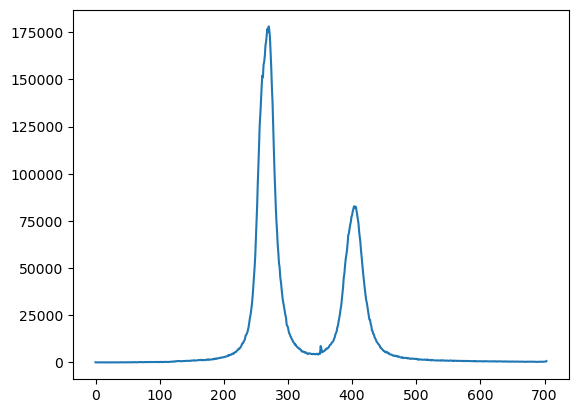

In [9]:
#Cu k-alpha line
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='mfx',experiment_id='mfxl1045123',lcls_run=23)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
xes.key_epix=['epix_1/ROI_0_area']
#xes.set_key_aliases(keys,names)
#xes.import_roi=[[0,100]]
xes.rois=[[100,125]]
xes.adu_cutoff=3.0
xes.angle=0
xes.transpose=True
xes.run_parser(['247'])
start=time.time()
xes.primary_analysis_parallel_range(4,xes_experiment,method=xes.primary_analysis_static,increment=2000,verbose=False)
end=time.time()
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_ROI_1_summed')
plt.plot(v.summed_xes)
run247_Cu=v.summed_xes

In [66]:
xes.analyzed_runs[0].epix_summed
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_summed')
v.summed_xes

array([[649.0609 , 537.3293 , 663.874  , ..., 904.3899 , 745.25464,
        777.83124],
       [627.8034 , 632.3088 , 631.5599 , ..., 663.2698 , 662.19037,
        662.409  ],
       [549.6906 , 432.0657 , 488.11548, ..., 580.2496 , 548.8823 ,
        496.84354],
       ...,
       [553.94366, 448.30478, 469.80008, ..., 600.77325, 568.0748 ,
        549.3998 ],
       [624.82996, 634.4699 , 725.8672 , ..., 634.6102 , 652.186  ,
        694.0881 ],
       [756.6487 , 714.1586 , 712.8387 , ..., 717.2086 , 851.8159 ,
        905.2843 ]], dtype=float32)

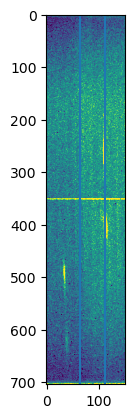

In [67]:
vmin, vmax = np.percentile(v.summed_xes, [1,99])
plt.imshow(v.summed_xes,vmin = vmin, vmax = vmax)
#plt.imshow(xes.analyzed_runs[0].epix_summed)
plt.axvline(111)
plt.axvline(64)

Processing: 100%|██████████| 2/2 [00:01<00:00,  1.06Shot_Batch/s]


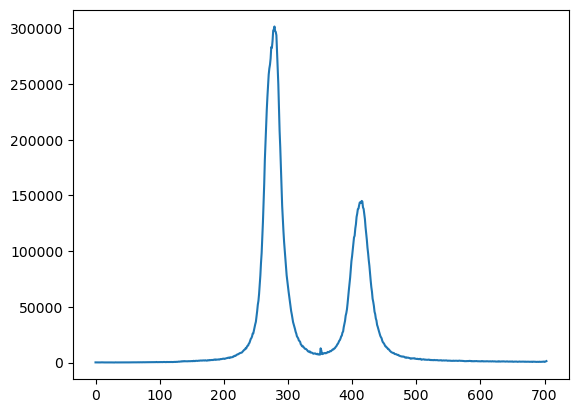

In [10]:
#Cu k-alpha line
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='mfx',experiment_id='mfxl1045123',lcls_run=23)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
xes.key_epix=['epix_1/ROI_0_area']
#xes.set_key_aliases(keys,names)
#xes.import_roi=[[0,100]]
xes.rois=[[100,125]]
xes.adu_cutoff=3.0
xes.angle=0
xes.transpose=True
xes.run_parser(['100'])
start=time.time()
xes.primary_analysis_parallel_range(4,xes_experiment,method=xes.primary_analysis_static,increment=2000,verbose=False)
end=time.time()
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_ROI_1_summed')
plt.plot(v.summed_xes)
run100_Cu=v.summed_xes

In [13]:
run100_max_index = np.argmax(run100_Cu)
print(run100_max_index) 

279


In [14]:
run247_max_index = np.argmax(run247_Cu)
print(run247_max_index) 

270


(200.0, 350.0)

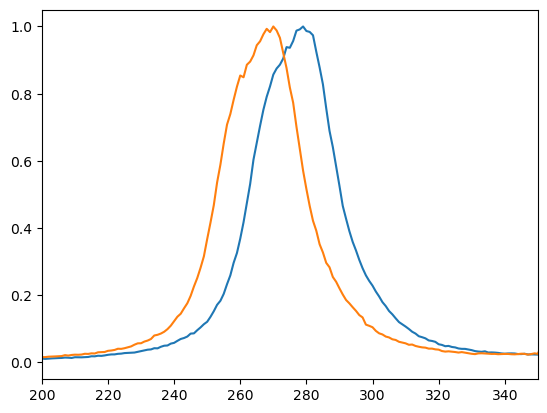

In [19]:
run100_Cu_n = run100_Cu/np.max(run100_Cu[200:300])
run247_Cu_n = run247_Cu/np.max(run247_Cu[200:300])
plt.plot(run100_Cu_n)
plt.plot(run247_Cu_n)


plt.xlim(200, 350)

# Set y-axis limits
#plt.ylim(675, 200)

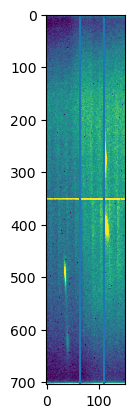

In [69]:
xes.analyzed_runs[0].epix_summed
v.combine_static_spectra(xes_analysis=xes,xes_key='epix_summed')
v.summed_xes
vmin, vmax = np.percentile(v.summed_xes, [1,99])
plt.imshow(v.summed_xes,vmin = vmin, vmax = vmax)
#plt.imshow(xes.analyzed_runs[0].epix_summed)
plt.axvline(110)
plt.axvline(64)

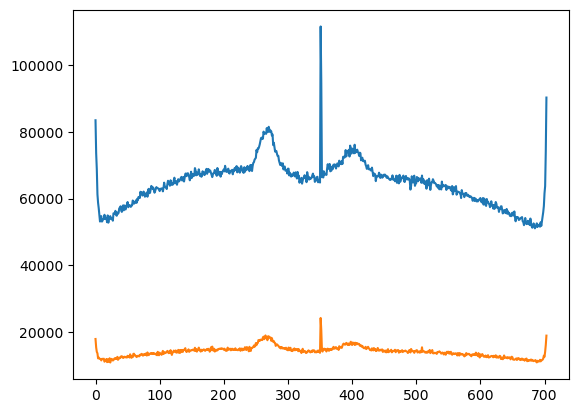

In [70]:
plt.plot(run100_Cu)
plt.plot(run247_Cu)

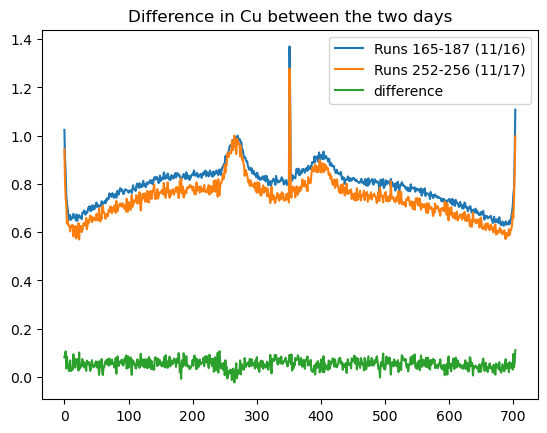

In [72]:
run100_Cu_n = run100_Cu/np.max(run100_Cu[200:300])
run247_Cu_n = run247_Cu/np.max(run247_Cu[200:300])
plt.plot(run100_Cu_n)
plt.plot(run247_Cu_n)
diff_Cu_foil = run100_Cu_n-run247_Cu_n
plt.plot(diff_Cu_foil)
plt.title('Difference in Cu between the two days')
plt.legend(['Runs 165-187 (11/16)','Runs 252-256 (11/17)','difference'])

In [ ]:
#in a pinch normalization
#plt.plot((run3_Fe-np.min(run3_Fe)/np.max(run3_Fe))

In [ ]:
xes.status

<font size=5>XES Analysis and Visualization Test</br>With ROTATION</font>

In [ ]:
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='mfx',experiment_id='mfxl1027922',lcls_run=22)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
keys=['tt/ttCorr','epics/lxt', 'enc/lasDelay' , 'ipm4/sum','tt/AMPL'] 
names=['time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl']
#Here we define the epix detector keys separately as they are imported separately to avoid OOM
xes.key_epix=[r'epix_2/ROI_0_area']
xes.friendly_name_epix=['epix']
##
xes.set_key_aliases(keys,names)
#xes.end_index=5000
xes.mintime=-0.9
xes.maxtime=0.9
xes.numpoints=40
xes.time_bins=np.linspace(xes.mintime,xes.maxtime,xes.numpoints)
xes.rois=[[0,50]]
xes.adu_cutoff=3.0
xes.angle=90
xes.lxt_key=None
xes.transpose=True
#xes.add_filter('xray','ipm4',1.0E3)
#xes.add_filter('simultaneous','ipm4',1.0E3)
xes.add_filter('simultaneous','time_tool_ampl',0.05)
xes.run_parser(['44-46'])
#pixels.pat

In [ ]:
start=time.time()
xes.primary_analysis_parallel_range(8,xes_experiment,increment=1000,verbose=False)
end=time.time()

In [ ]:
xes.status

In [ ]:
v=XSpect.XSpect_Visualization.XESVisualization()

v.combine_spectra(xes_analysis=xes,xes_key='epix_xray_not_laser_time_binned_ROI_1',xes_laser_key='epix_simultaneous_laser_time_binned_ROI_1')
v.vmin=-0.006
v.vmax=0.004
#xes.analyzed_runs[0].kbeta_energy=np.linspace(6430,6370,len(xes.analyzed_runs[0].kbeta_energy))
v.plot_2d_difference_spectrum(xes)
plt.xlim(-0.8,0.8)
#plt.ylim(7075,7065)

In [ ]:
diff=np.abs(xes.summed_laser_on_normalized-xes.summed_laser_off_normalized)

In [ ]:
plt.title(f'Runs: %s' % xes.runs)
plt.plot(xes.time_bins[1:],np.nansum(diff[2:,340:368],axis=1),'o-')
plt.xlabel('Time (ps)')
plt.ylabel('$\Delta$ XES')
plt.tight_layout()

In [ ]:
def error_function(x, a, b, c, d):
    return a * (1 + scipy.special.erf(b * (x - c))) + d
def gaussian(x, amplitude, center, fwhm, offset):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2)) + offset

from scipy.optimize import curve_fit
import scipy
bins_center=xes.time_bins[1:]
norm_epix=np.nansum(diff[2:,340:368],axis=1)
initial_guess = [np.max(norm_epix), 0.003, np.mean(bins_center), np.min(norm_epix)]  # Initial guess for the parameters
params, covariance = curve_fit(error_function, bins_center, norm_epix, p0=initial_guess,maxfev=99999999)

In [ ]:
import XSpect.XSpect_PostProcessing
ana = XSpect.XSpect_PostProcessing.post_analysis()
nsvd = 2
diff_svd = ana.svdreconstruct(diff[2:], nsvd)
plotmax = np.max(np.abs(diff_svd))
contlevels = np.linspace(-plotmax, plotmax, 50)
plt.contourf(xes.analyzed_runs[0].kbeta_energy, xes.time_bins[1:], diff_svd, contlevels, cmap = 'RdBu')
plt.title(f'SVD Reconstruction {xes.runs}')

plt.xlabel('Energy (keV)')
plt.ylabel('Time (ps)')
plt.tight_layout()
plt.savefig(f'SVD Reconstruction {xes.runs}.jpg')

In [ ]:
# en_kin_min, en_kin_max = 7.124, 7.126

# indx_min = np.argmin(np.abs(xas.ccm_bins - en_kin_min))
# indx_max = np.argmin(np.abs(xas.ccm_bins - en_kin_max))
# kintrace = np.nanmean(diff_svd[:,indx_min:indx_max], axis=1)
# plt.plot(xas.time_bins, kintrace)

low=7060
hi=7070

low_e=np.argmin(np.abs(xes.analyzed_runs[0].kbeta_energy-low))
hi_e=np.argmin(np.abs(xes.analyzed_runs[0].kbeta_energy-hi))
kintrace = np.nansum(diff_svd[:,hi_e:low_e],axis=1)
plt.plot(xes.time_bins[1:], kintrace)

plt.title(f'Kinetic plot {low} - {hi} eV Summed')
plt.xlabel('Time (ps)')